## Riskiness of Portfolio


Variance of portfolio = Weights transposed * (Covariance matrix * Weights)

In [84]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
assets = ['DMART.NS', 'RELIANCE.NS', 'SUNFLAG.NS', 'TITAN.NS', 'SBIN.NS']

df= pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start ='2018-1-1', end = '2020-1-5')['Adj Close']
    
df.head()

,DMART.NS,RELIANCE.NS,SUNFLAG.NS,TITAN.NS,SBIN.NS
Date,,,,,
2018-01-01,1170.500000,895.929260,79.519279,834.648621,307.100006
2018-01-02,1160.000000,897.308044,78.837967,827.501099,303.250000
2018-01-03,1184.550049,900.902649,80.443932,838.418213,302.850006
2018-01-04,1203.099976,906.319092,81.855217,874.253967,308.500000
2018-01-05,1243.400024,909.224243,80.979248,890.703064,306.350006


In [86]:
port_returns = df.pct_change()
port_returns.head()

,DMART.NS,RELIANCE.NS,SUNFLAG.NS,TITAN.NS,SBIN.NS
Date,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,-0.008971,0.001539,-0.008568,-0.008564,-0.012537
2018-01-03,0.021164,0.004006,0.020370,0.013193,-0.001319
2018-01-04,0.015660,0.006012,0.017544,0.042742,0.018656
2018-01-05,0.033497,0.003205,-0.010701,0.018815,-0.006969


In [87]:
covariance_matrix = port_returns.cov()
covariance_matrix

,DMART.NS,RELIANCE.NS,SUNFLAG.NS,TITAN.NS,SBIN.NS
DMART.NS,0.000436,0.000088,0.000143,0.000106,0.000112
RELIANCE.NS,0.000088,0.000285,0.000087,0.000082,0.000091
SUNFLAG.NS,0.000143,0.000087,0.001050,0.000127,0.000229
TITAN.NS,0.000106,0.000082,0.000127,0.000330,0.000094
SBIN.NS,0.000112,0.000091,0.000229,0.000094,0.000439


In [88]:
# Annual Returns - covariance matrix
covariance_matrix = (pow(covariance_matrix+1,(365))-1)
covariance_matrix

,DMART.NS,RELIANCE.NS,SUNFLAG.NS,TITAN.NS,SBIN.NS
DMART.NS,0.172558,0.032561,0.053590,0.039612,0.041749
RELIANCE.NS,0.032561,0.109770,0.032169,0.030222,0.033698
SUNFLAG.NS,0.053590,0.032169,0.466847,0.047361,0.087163
TITAN.NS,0.039612,0.030222,0.047361,0.127855,0.034882
SBIN.NS,0.041749,0.033698,0.087163,0.034882,0.173603


In [89]:
weights = np.random.random(5)
weights = weights/sum(weights)
weights

array([0.3613535 , 0.0006663 , 0.27062072, 0.1820824 , 0.18527709])

In [90]:
sum(weights)

1.0

In [91]:
port_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
port_variance

0.10400864536022761

In [92]:
print(str(round(port_variance, 4) * 100) + '%')

10.4%


In [93]:
# Standard Deviation

port_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
port_risk

0.32250371371540454

In [99]:
print('Associated Risk of the Portfolio: ',str(round(port_risk, 4) * 100) + '%')

Associated Risk of the Portfolio:  32.25%


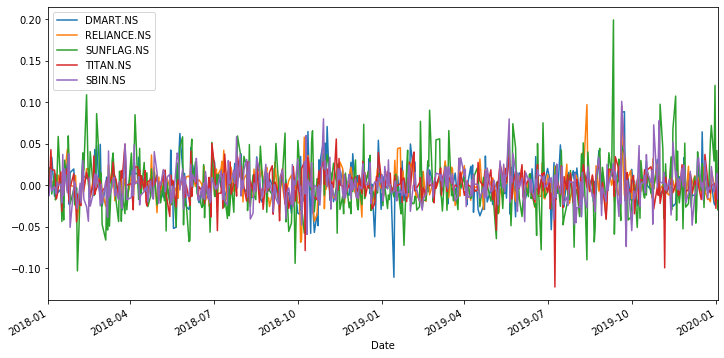

In [95]:
port_returns.plot(figsize=(12 ,6))

In [96]:
port_returns.describe()

,DMART.NS,RELIANCE.NS,SUNFLAG.NS,TITAN.NS,SBIN.NS
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.001144,0.001236,-0.001003,0.000787,0.000387
std,0.020886,0.016893,0.032407,0.018157,0.020944
min,-0.110871,-0.068749,-0.103218,-0.122560,-0.073860
25%,-0.009903,-0.009475,-0.020135,-0.007794,-0.012617
50%,0.000066,0.000574,-0.003978,0.001291,-0.000193
75%,0.010709,0.011375,0.014734,0.009802,0.012484
max,0.088462,0.096937,0.198885,0.095690,0.100894


In [97]:
#Correlation
port_returns.corr()

,DMART.NS,RELIANCE.NS,SUNFLAG.NS,TITAN.NS,SBIN.NS
DMART.NS,1.000000,0.248811,0.211325,0.280662,0.256177
RELIANCE.NS,0.248811,1.000000,0.158460,0.265944,0.256643
SUNFLAG.NS,0.211325,0.158460,1.000000,0.215470,0.337378
TITAN.NS,0.280662,0.265944,0.215470,1.000000,0.247024
SBIN.NS,0.256177,0.256643,0.337378,0.247024,1.000000


In [98]:
# annual standard deviation
print('Annual std dev of DMART: ', (round(port_returns['DMART.NS'].std() * np.sqrt(250),2)))
print('Annual std dev of RELIANCE: ', (round(port_returns['RELIANCE.NS'].std() * np.sqrt(250),2)))
print('Annual std dev of SUNFLAG: ', (round(port_returns['SUNFLAG.NS'].std() * np.sqrt(250),2)))
print('Annual std dev of TITAN: ', (round(port_returns['TITAN.NS'].std() * np.sqrt(250),2)))
print('Annual std dev of SBIN: ', (round(port_returns['SBIN.NS'].std() * np.sqrt(250),2)))


Annual std dev of DMART:  0.33
Annual std dev of RELIANCE:  0.27
Annual std dev of SUNFLAG:  0.51
Annual std dev of TITAN:  0.29
Annual std dev of SBIN:  0.33
